In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_ogci = pd.read_excel('Cycle5_Final_Database.xlsx', header=2)

In [3]:
has_values = []
for i in range(len(df_ogci)):
    try:
        if (df_ogci['Thickness m'].iloc[i] > 0) and (df_ogci['Site Area km2'].iloc[i] > 0):
            has_values.append(True)
        else:
            has_values.append(False)
    except:
        has_values.append(False)

In [4]:
cvf = []

labels = ['Stored', 'Capacity', 'Sub-Commercial', 'Undiscovered']

for label in labels:
    conversion_factors = 1e9 * df_ogci[label][has_values] / (1e6 * df_ogci['Site Area km2'][has_values] * df_ogci['Thickness m'][has_values])
    cvf.append(conversion_factors[df_ogci[label]>0])

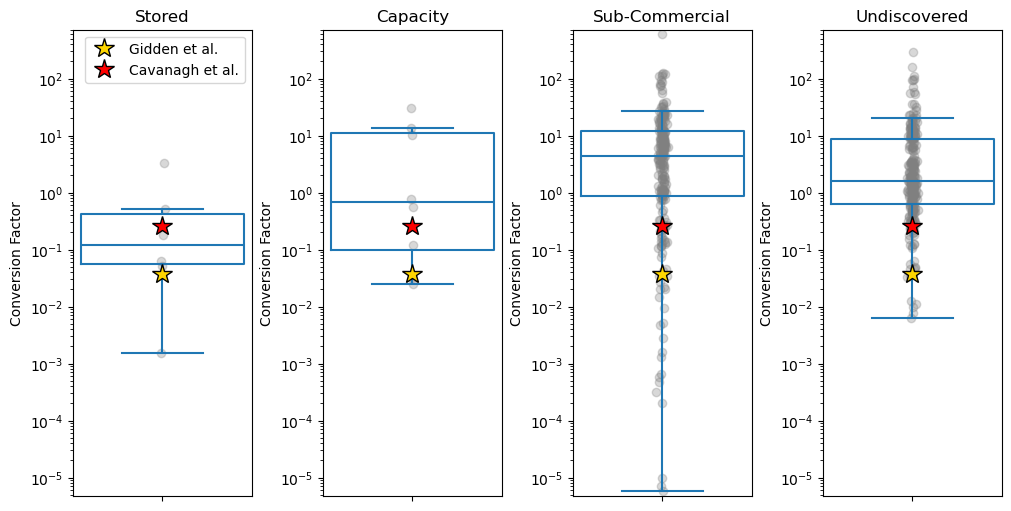

In [5]:
fig, axs = plt.subplots(1, 4, figsize=[10, 5], layout='constrained')

ymin = 1e1
ymax = 1e-9
for i in range(len(labels)):
    sns.boxplot(y=cvf[i], ax=axs[i], fill=False, showfliers=False)
    cx = axs[i].scatter(x=np.random.normal(0, 0.01, len(cvf[i])), y=cvf[i], c='gray', alpha=0.3)
    if np.nanmax(cvf[i]) > ymax:
        ymax = np.nanmax(cvf[i])
    if np.nanmin(cvf[i]) < ymin:
        ymin = np.nanmin(cvf[i])
    axs[i].plot(0, 0.037, '*', mfc='gold', mec='k', markersize=15, label='Gidden et al.')
    axs[i].plot(0, 0.26, '*', mfc='red', mec='k', markersize=15, label='Cavanagh et al.')

for i in range(len(labels)):
    axs[i].set_ylabel('Conversion Factor')
    axs[i].set_title(labels[i])
    axs[i].set_yscale('log')
    axs[i].set_ylim(ymin - (0.2 * ymin), ymax + (0.2 * ymax))

axs[0].legend()

fig.savefig('conversion-factors-cycle5.png')
plt.show()

In [6]:
np.mean(cvf[0])

np.float64(0.6928369671086609)

In [7]:
np.median(cvf[0])

np.float64(0.1223558348699173)

In [8]:
len(cvf[0])

6

In [9]:
cvf[0]

160     0.061785
189     0.001522
322     0.182927
577     0.052354
604     3.351768
1213    0.506667
dtype: object

In [13]:
df_ogci['Site Name'].iloc[cvf[0].index]

160                  Quest CCS Project
189                          Aquistore
322     Tomakomai - Moebetsu Formation
577                 Citronelle Project
604              IBDP: Decatur Project
1213                     Krechba Field
Name: Site Name, dtype: object